In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('Resources/Unemployment_mental_illness_survey.csv')
# df.head()
# 


In [5]:
clean_df=df.rename(columns={"I am currently employed at least part-time":"employed",
                   "I identify as having a mental illness":"mental_illness", 
                   "I have my own computer separate from a smart phone":"own_computer",
                   "I have been hospitalized before for my mental illness":"hospitalized",
                   "How many days were you hospitalized for your mental illness":"hospitalized_days",
                   "I am legally disabled":"disabled",
                "I have my regular access to the internet":"internet",
                   "I live with my parents":"with_parents","I have a gap in my resume":"gap",
                   "Total length of any gaps in my resume in months.":"months_gap",
                   "Annual income (including any social welfare programs) in USD":"income_with_social",
                   "I am unemployed":"unemployed",
                   "I read outside of work and school":"read",
                   "Annual income from social welfare programs":"welfare_income",
                   "I receive food stamps":"food_stamp",
                   "I am on section 8 housing":"section_8",
                   "How many times were you hospitalized for your mental illness":"times_hospitalized",
                   "Lack of concentration":"Lack_concentration",
                   "Obsessive thinking":"Obsessive_thinking",
                   "Mood swings":"Mood_swings",
                   "Panic attacks":"Panic_attacks",
                   "Compulsive behavior":"Compulsive_behavior",
                   "Household Income":"Household_Income",
                   "Device Type":"Device"
                  })
# clean_df

In [6]:
#predict=mental_illness
#we try to the outstanding variable that has the highest correlation to our prediction 
selected_df=clean_df[["employed","mental_illness","Education","hospitalized","disabled","with_parents","gap","months_gap","income_with_social","read","welfare_income","food_stamp","section_8","Lack_concentration","Anxiety","Depression","Obsessive_thinking","Mood_swings","Panic_attacks","Compulsive_behavior","Tiredness","Age","Gender","Household_Income"]]
selected_df
s_df=selected_df.fillna(0)
s5_df = s_df[s_df.Household_Income != "Prefer not to answer"]
s5_df


,employed,mental_illness,Education,hospitalized,disabled,with_parents,gap,months_gap,income_with_social,read,...,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household_Income
0,0,0,High School or GED,0,0,0,1,24,35,1,...,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999"
1,1,1,Some Phd,0,0,0,0,1,22,1,...,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999"
2,1,0,Completed Undergraduate,0,0,0,0,0,100,1,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999"
3,0,0,Some Undergraduate,0,0,1,1,11,0,1,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999"
4,1,1,Completed Undergraduate,1,1,0,1,33,32,1,...,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,1,Completed Undergraduate,0,0,0,0,0,40,1,...,1,0,0.0,0.0,0.0,0.0,0.0,18-29,Female,"$50,000-$74,999"
330,1,0,Some Undergraduate,0,0,1,0,0,62,1,...,0,0,0.0,0.0,0.0,0.0,0.0,18-29,Male,"$50,000-$74,999"
331,1,0,Some Undergraduate,0,0,0,0,0,0,1,...,0,0,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$10,000-$24,999"
332,0,1,Some Undergraduate,1,1,1,1,30,12,1,...,1,1,1.0,1.0,1.0,1.0,1.0,18-29,Female,"$0-$9,999"


In [15]:
s5_df.corr

<bound method DataFrame.corr of      employed  mental_illness                Education  hospitalized  \
0           0               0       High School or GED             0   
1           1               1                 Some Phd             0   
2           1               0  Completed Undergraduate             0   
3           0               0       Some Undergraduate             0   
4           1               1  Completed Undergraduate             1   
..        ...             ...                      ...           ...   
328         0               1  Completed Undergraduate             0   
330         1               0       Some Undergraduate             0   
331         1               0       Some Undergraduate             0   
332         0               1       Some Undergraduate             1   
333         1               1       Some Undergraduate             0   

     disabled  with_parents  gap  months_gap  income_with_social  read  ...  \
0           0           

In [10]:
# me_df=s5_df.select_dtypes(include=['object']).copy()
du_df=pd.get_dummies(s5_df, columns=['Education','Age','Gender','Household_Income'])
du_df


,employed,mental_illness,hospitalized,disabled,with_parents,gap,months_gap,income_with_social,read,welfare_income,...,"Household_Income_$0-$9,999","Household_Income_$10,000-$24,999","Household_Income_$100,000-$124,999","Household_Income_$125,000-$149,999","Household_Income_$150,000-$174,999","Household_Income_$175,000-$199,999","Household_Income_$200,000+","Household_Income_$25,000-$49,999","Household_Income_$50,000-$74,999","Household_Income_$75,000-$99,999"
0,0,0,0,0,0,1,24,35,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,1,22,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,100,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,1,11,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,1,0,1,33,32,1,30,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,1,0,0,0,0,0,40,1,0,...,0,0,0,0,0,0,0,0,1,0
330,1,0,0,0,1,0,0,62,1,0,...,0,0,0,0,0,0,0,0,1,0
331,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
332,0,1,1,1,1,1,30,12,1,12,...,1,0,0,0,0,0,0,0,0,0


In [12]:
for each_column in du_df.columns: 
    print(du_df[each_column].value_counts())

1    206
0     90
Name: employed, dtype: int64
0    221
1     75
Name: mental_illness, dtype: int64
0    271
1     25
Name: hospitalized, dtype: int64
0    264
1     32
Name: disabled, dtype: int64
0    264
1     32
Name: with_parents, dtype: int64
0    221
1     75
Name: gap, dtype: int64
0      191
1       18
100     10
24       6
2        5
12       5
30       4
6        4
3        3
5        3
18       3
7        3
10       3
9        3
22       2
14       2
15       2
11       2
13       2
28       2
32       2
36       2
48       2
8        1
4        1
73       1
66       1
20       1
16       1
59       1
97       1
23       1
33       1
43       1
44       1
45       1
47       1
52       1
53       1
21       1
Name: months_gap, dtype: int64
0      27
100    22
25     11
50     10
35      8
       ..
51      1
48      1
99      1
31      1
43      1
Name: income_with_social, Length: 83, dtype: int64
1    263
0     33
Name: read, dtype: int64
0      246
1        8
2        4
4

<bound method DataFrame.corr of      employed  mental_illness  hospitalized  disabled  with_parents  gap  \
0           0               0             0         0             0    1   
1           1               1             0         0             0    0   
2           1               0             0         0             0    0   
3           0               0             0         0             1    1   
4           1               1             1         1             0    1   
..        ...             ...           ...       ...           ...  ...   
328         0               1             0         0             0    0   
330         1               0             0         0             1    0   
331         1               0             0         0             0    0   
332         0               1             1         1             1    1   
333         1               1             0         1             0    0   

     months_gap  income_with_social  read  welfare_inco

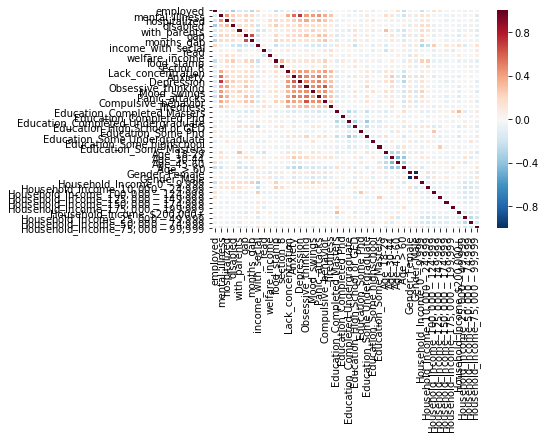

In [13]:
pearsoncorr=du_df.corr(method='pearson')
import seaborn as sb
sb.heatmap(pearsoncorr,xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns,cmap='RdBu_r', annot=False,linewidth=1)



In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, naive_bayes, metrics
def train_model(classifier, feature_vector_train, train_label, feature_vector_valid, valid_label, is_neural_net=False):
    classifier.fit(feature_vector_train, train_label)
    predictions=classifier.predict(feature_vector_valid)
    if is_neural_net:
        predictions=predictions.argmax(axis=-1)
    return metrics.accuracy_score(predictions, valid_label)



In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.preprocessing import StandardScaler
X_list=["employed","hospitalized","disabled","with_parents","gap","months_gap","income_with_social","read","welfare_income","food_stamp","section_8","Lack_concentration","Anxiety","Depression","Obsessive_thinking","Mood_swings","Panic_attacks","Compulsive_behavior","Tiredness","educ_label","income_label","age_label","gender_label"]
X = s10_df[["employed","hospitalized","disabled","with_parents","gap","months_gap","income_with_social","read","welfare_income","food_stamp","section_8","Lack_concentration","Anxiety","Depression","Obsessive_thinking","Mood_swings","Panic_attacks","Compulsive_behavior","Tiredness","educ_label","income_label","age_label","gender_label"]]
y = s10_df.mental_illness.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
def scaler_var(column):
    return StandardScaler().fit(column)
for each_x in X_list:
    X_scaler=scaler_var(s10_df[[each_x]])
    X_scaler=StandardScaler().fit(X_train)
    X_train_scaled=X_scaler.transform(X_train)
    X_test_scaled=X_scaler.transform(X_train)
#     y_scaler=StandardScaler().fit(y_train)
# print("Shape: ", X.shape, y.shape)
#     y_train_scaled=y_scaler.transform(y_train)
#     y_test_scaled=y_scaler.transform(y_train)
    accuracy=train_model(LogisticRegression(),X_train_scaled,y_train_scaled, X_test_scaled,y_test_scaled)
    print(accuracy)
    print("-"*12)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Unknown label type: 'continuous'

NameError: name 'x_train_counts' is not defined

In [ ]:
accuracy=train_model(naive_bayes.MultinomialNB(),)